![Astrofisica Computacional](../logo.PNG)

---
## 53. Smoothed Particle Hydrodynamics (SPH)

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

Se presenta un modelos simple que ilustra como solucionar las ecuaciones de la hidrodinámica a partir de un modelo de elementos (particulas) suavizado (Smoothed Particle Hydrodynamics SPH) .


---

---

## El Modelo SPH

En el modelo SPH, un fluido es representado por una colección de elementos (partículas) y cada uno de ellos posee ciertas cantidades físicas relevantes como posición, velocidad, masa, densidad, etc.

Como ejemplo particular se considerará un sistema físico descrito por la ecuación de Euler para un fluido ideal sin disipasión,

\begin{equation}
\rho \frac{d\textbf{v}}{dt} = - \boldsymbol{\nabla} P + \textbf{f}
\end{equation}

donde

- $\rho$: densidad
- $\textbf{v}$: velocidad del fluido
- $P$: Presión
- $\textbf{f}$: Fuerzas por unidad de volumen adicionales 

Al considerar un gas ideal, se introduce la ecuación de estado que lo describe $P=P(\rho)$ y al combinarla con la ecuación de energías, se obtiene la ecuación de estado politrópica:

\begin{equation}
P = k\rho^{\gamma} = k\rho^{1+\fra{1}{n}},
\end{equation}

donde $k$ es una constante de proporcionalidad, $\gamma$ es el índice adiabático y $n$ se denomina el índice politrópico.


### El Kernel

Para resolver el sistema, debe evaluarse la aceleración de cada elemento $\frac{d\textbf{v}}{dt}$ y de la ecuación de Euler se observa que, para lograr este objetivo, deben evaluarse algunas derivadas espaciales. En el modelo SPH se considerará la siguiente identidad, valida para cualquier cantidad escalar $F(\textbf{r})$,

\begin{equation}
F(\textbf{r}) = \int F(\textbf{r}') \delta (\textbf{r} - \textbf{r}') d\textbf{r}'
\end{equation}

donde $\delta (\textbf{r})$ es la función Delta de Dirac. Ahora bien, esta relación se modificará introduciendo un *kernel suavizado* $W(\textbf{r};h)$ que reemplazará a la Delta de Dirac. El parámetro $h$ corresponde precidsamente a la escala de longitud de suavizado. El kernel debe ser una función no-negativa, invariante bajo paridad y debe satisfacer las condiciones

\begin{equation}
\int W(\textbf{r};h) d\textbf{r} = 1
\end{equation}

y 

\begin{equation}
\lim_{h\rightarrow 0} W(\textbf{r};h) = \delta(\textbf{r}).
\end{equation}

Dos ejemplos de kernel utilizados en la literatura son:

* **Kernel Gaussiano**

En est caso se tiene la función

\begin{equation}
W(\textbf{r};h) = \left( \frac{1}{h\sqrt{\pi}}\right)^d \exp \left( -\frac{\left| \textbf{r}\right|^2}{h^2}\right)
\end{equation}

donde $d$ es la dimensión del problema. Este kernel es el más paropiado para resolver problemas físicos [[Gingold and Monaghan, 1977]](https://ui.adsabs.harvard.edu/abs/1977MNRAS.181..375G/abstract).

* **Kernel de spline cúbico**

En este caso, la función que actua como kernel es

\begin{equation}
W(\textbf{r};h) = C_d (h) 
\begin{cases}
(2-q)^3 - 4(1-q)^3 & \hspace{1cm} 0\leq q <1 \\
(2-q)^3 & \hspace{1cm} 1\leq q <2 \\
0 & \hspace{1cm}  q\geq 2
\end{cases}
\end{equation}

donde $q = \frac{\left|\textbf{r}\right|}{h}$ y el coeficiente depende de la dimnsionalidad del problema en la forma

\begin{equation}
C_d (h) = 
\begin{cases}
\frac{1}{6h} & \hspace{1cm} d = 1\\
\frac{5}{14\pi h^2} & \hspace{1cm} d = 2\\
\frac{1}{4\pi h^3} & \hspace{1cm} d = 3
\end{cases}
\end{equation}

Este kernel puede disminuir notablemente el tiempo de computo debido a que es una función con soporte compacto (i.e. el conjunto donde no es nula conforma un conjunto cerrado y acotado) y por ello la interacción entre dos particulas mediada por el kernel es simplemente cero si ellas están suficientemente alejadas una de la otra.


### Estabilidad del Método FTCS

Para analizar la estabilidad del método FTCS, se examinará el comportamiento de la solución aproximada $\phi^{(n)}_{i,j}$ cuando $n \rightarrow \infty$. 

Considerando la función inicial

\begin{equation}
\phi^{(0)}_{i,j}  = e^{iax_i} e^{iby_j}
\end{equation}

y evolucionando con la relación iterativa se tiene

\begin{align}
\phi^{(1)}_{i,j} = & e^{iax_i} e^{iby_j} + \alpha \left[ e^{iax_{i+1}} e^{iby_j}  + e^{iax_{i-1}} e^{iby_j} + e^{iax_i} e^{iby_{j+1}}  + e^{iax_i} e^{iby_{j-1}} - 4 e^{iax_i} e^{iby_j} \right]\\
\phi^{(1)}_{i,j} = & e^{iax_i} e^{iby_j} \left[1 + \alpha \left( e^{iah_s}  + e^{-iah_s}  +  e^{ibh_s}  + e^{-ibh_s} - 4 \right) \right]\\
\phi^{(1)}_{i,j} = &  \left[1 + 2\alpha \left( \cos ah_s - 1 \right) + 2\alpha \left( \cos bh_s - 1 \right) \right]\phi^{(0)}_{i,j}\\
\phi^{(1)}_{i,j} = &  \xi \phi^{(0)}_{i,j}
\end{align}

donde se ha definido el *factor de amplificación*
\begin{align}
 \xi = & 1 + 2\alpha \left( \cos ah_s - 1 \right) + 2\alpha \left( \cos bh_s - 1 \right)\\
 \xi = & 1 - 4\alpha \sin^2 \left( \frac{ah_s}{2}\right) - 4\alpha \sin^2 \left( \frac{bh_s}{2} \right).
\end{align}

Aplicando repetidamente la relación iterativa se obtiene

\begin{equation}
\phi^{(n)}_{i,j} = \xi ^n \phi^{(0)}_{i,j}.
\end{equation}

Claramente, para que el método sea estable se necesita que $-1 \leq \xi \leq 1$, lo cual se cumple para cualquier valor de $a$ y $b$ si $\alpha \leq \frac{1}{4}$. Esta se conoce como la *condición de Courant*.

**Nota:** En una dimensión espacial, la condición de Courant es $\alpha \leq \frac{1}{2}$.



## El Método de Crank-Nicholson

El método de Crank-Nicholson es útil para resolver la ecuación de difusión unidimensional,

\begin{equation}
\frac{\partial \phi}{\partial t} = k \frac{\partial^2 \phi}{\partial x^2}.
\end{equation}

En este caso se utilizarán diferencias finitas hacia adelante para al derivada temporal, pero en lugar de utilizar una diferencia centrada para la derivada espacial, se utilizará el promedio de las diferencias centradas en los tiempos $t$ y $t+h_t$. Esto conduce a la expresión

\begin{align}
\frac{\phi^{(n+1)}_{i} - \phi^{(n)}_{i}}{h_t} = \frac{k}{2} \left[ \frac{\phi^{(n)}_{i+1} - 2\phi^{(n)}_{i} + \phi^{(n)}_{i-1}}{h_s^2} + \frac{\phi^{(n+1)}_{i+1} - 2\phi^{(n+1)}_{i} + \phi^{(n+1)}_{i-1}}{h_s^2}\right]
\end{align}

o despejando la relación de recurrencia,

\begin{align}
\phi^{(n+1)}_{i} - \frac{\alpha}{2} \left[\phi^{(n+1)}_{i+1} - 2\phi^{(n+1)}_{i} + \phi^{(n+1)}_{i-1}\right] = \phi^{(n)}_{i} + \frac{\alpha}{2} \left[\phi^{(n)}_{i+1} - 2\phi^{(n)}_{i} + \phi^{(n)}_{i-1}\right].
\end{align}

Este es catalogado como un método implícito debido a que para obtener $\phi^{(n+1)}_{i}$ a partir de $\phi^{(n)}_{i}$ se debe resolver un sistema de ecuaciones lineales acopladas el cual tendrá una estructura tri-diagonal (y por lo tanto puede resolverse fácilmente). 

### Estabilidad del Método de Crank-Nicholson

Al igual que en el caso del método FTCS, la estabilidad de este método se estudia al considerar la condición inicial $\phi^{(0)}_{i} = e^{iax}$, lo que lleva a la relación

\begin{equation}
\phi^{(n)}_i = \xi ^n \phi^{(0)}_i 
\end{equation}

donde

\begin{equation}
\xi = \frac{1 - 2\alpha \sin^2 \left( \frac{a h_s}{2}\right)}{1 + 2\alpha \sin^2 \left( \frac{a h_s}{2}\right)}.
\end{equation}

Ya que $\xi < 1$ para cualquier valor de $\alpha$, $a$ y $b$, se concluye que el método de Crank-Nicholson es incondicionalmente estable. Este resultado implica que los tamaños de los pasos $h_t$ y $h_s$ se pueden escoger teniendo en cuenta los criterios del error de truncamiento únicamente y no requerimientos de estabilidad.

---
### Ejemplo 

Para ilustrar la construcción del sistema lineal, considere el siguiente problema simple:

Queremos resolver la ecuación de Poisson en la región $0\leq x \leq 1$, $0\leq y \leq 1$ con $\rho (x,y) = 2y$. Las condiciones de frontera (Dirichlet) serán $\phi(x,0) = 0$, $\phi(0,y) = 0$, $\phi(1,y) = y$ y $\phi(x,1) = x$.

Para solucionar el problema utilizaremos una malla de discretización con $h=\frac{1}{3}$ en ambas direcciones (con este valor tan grande del espacio entre nodos no se obtendrá un resultado mu preciso).
De esta forma, la malla tendrá $4 \times 4$ nodos localizados en las coordenadas 

\begin{align}
x_i = &(x_0, x_1, x_2, x_3) = \left( 0, \frac{1}{3}, \frac{2}{3}, 1 \right)\\
y_i = &(y_0, y_1, y_2, y_3) = \left( 0, \frac{1}{3}, \frac{2}{3}, 1 \right)
\end{align}

y la función $\phi$ se discretizará con 16 valores, $\phi_{0,0}, \phi_{1,0}, \phi_{2,0}, ...$ .

Las condiciones de frontera serán entonces

\begin{align}
\phi_{0,0} = & \phi_{1,0} = \phi_{2,0} = \phi_{3,0} = 0\\
\phi_{0,1} = & \phi_{0,2} = \phi_{0,3} = 0 \\
\phi_{3,1} = &  \frac{1}{3}\\
\phi_{3,2} = &  \frac{2}{3}\\
\phi_{3,3} = & 1 \\
\phi_{1,3} = &  \frac{1}{3}\\
\phi_{2,3} = &  \frac{2}{3}.
\end{align}


se puede observar que los valores independientes impuestos por las condiciones de frontera son 12 y los valores que se quieren encontrar para $\phi$ son solamente 4: $\phi_{1,1}, \phi_{1,2}, \phi_{2,1}, \phi_{2,2}$.

Utilizando el stencil

\begin{equation}
\phi(x_{i+1},y_i)  + \phi(x_{i-1},y_i) + \phi(x_i,y_{i+1})  + \phi(x_i,y_{i-1}) - 4\phi(x_i,y_i) =  h^2 \rho (x_i,y_i)
\end{equation}

se construye el sistema lineal en la forma

Este sistema puede resolverse manualmente debido a que solo se tienen 4 valores de la función $\phi$ por obtener. Sin embargo, aqui encontraremos la slución utilizando la función [numpy.linalg.solve( )](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html),

In [1]:
import numpy as np

M = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 1,-4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 1,-4, 1, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 1,-4, 1, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0, 0, 1,-4, 1, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
             ])
b = np.array([0, 0, 0, 0, 0, 2/27, 2/27, 1/3, 0, 4/27, 4/27, 2/3, 0, 1/3, 2/3, 1])

In [10]:
phi = np.linalg.solve(M,b)
phi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06481481, 0.17592593, 0.33333333, 0.        , 0.15740741,
       0.37962963, 0.66666667, 0.        , 0.33333333, 0.66666667,
       1.        ])

Los valores encontrados para la función $\phi$ son
\begin{align}
\phi_{1,1} = & 0.0648\\ 
\phi_{2,1} = & 0.1759\\ 
\phi_{1,2} = & 0.1574\\
\phi_{2,2} = & 0.3796
\end{align}

Se puede derle una forma matricial a los resultados para visualizar el comportamiento de la función $\phi$ a través de la función [maptplotlib.pyplot.pcolormesh( )](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html),

In [11]:
phi = phi.reshape(4,4)
phi = phi.T
phi

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.06481481, 0.15740741, 0.33333333],
       [0.        , 0.17592593, 0.37962963, 0.66666667],
       [0.        , 0.33333333, 0.66666667, 1.        ]])

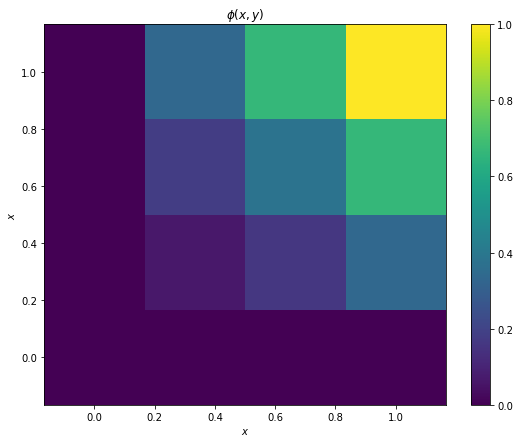

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,1,4)
y = np.linspace(0,1,4)

# Make the plot with colorbar
plt.figure(figsize=(9,7))
plt.pcolormesh(x, y, phi, shading='auto')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$x$')
plt.title(r'$\phi(x,y)$')
plt.show()

Aún cuando este método es fácilmente aplicable y rápido en el ejemplo presentado, cuando se trabaja un problema de la vida real, con un número grande de nodos, la solución del sistema de ecuaciones lineales puede necesitar un tiempo de computo muy largo. Si la discretización se realiza con $N$ puntos, la matriz $\phi_{i,j}$ tendrá $N^2$ elementos y el número de operaciones requerido para solucionar el sistema lineal correspondiente sera $\mathcal{O}(N^3)$. En el caso de $N=100$ esto significa un numero de operaciones del orden de $10^6$.

## Métodos de Relajación

Otra clase de algoritmos para la solución de la ecuación de Poisson son los denominados métodos de relajación. En estos, se comienza el proceso con un ansatz inicial que luego se modifica mediante iteraciones para ir acercandose a la solución verdadera.

### Método de Jacobi

Este es el método mas simple de todos y se puede resumir en los siguientes pasos:

1. Se inicializa la matriz $\phi_{i,j}$ con un ansatz inicial
2. Se aplican las condiciones de forntera
3. Para cada punto interior en la malla se calcula la cantidad
\begin{equation}
\phi^*_{i,j} = \frac{1}{4} \left( \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - h^2\rho_{i,j}\right)
\end{equation}

4. Para cada punto interior se reemplaza $\phi_{i,j}$ por $\phi^*_{i,j}$
5. Se vuelve al paso 2 hasta que la diferencia entre las dos aproximaciones mas recientes sea más pequeña que una tolerancia predeterminada.


A pesar de que el método de Jacobi es rápido y fácil de implementar, puede tener una lenta convergencia, especialmente para un gran número de nodos. 

### Método de Gauss-Seidel

Este método es similar al de Jacobi, excepto porque los pasos 3. y 4. descritos arriba se combinan de tal forma que $\phi_{i,j}$ se reemplaza por $\phi^*_{i,j}$ inmediatamente se calcula. Con esta pequeña modificación se logra mejorar el tiempo de calculo y adicionalmente se necesita menos espacio de memoria para almacenar los calculos intermedios.

### Método de Sobre-Relajación Sucesiva ( Succesive Over-Relaxation: SOR)

Otra modificación posible para los métodos anteriores corresponde a cambiar la actualización con la forma

\begin{equation}
\phi^*_{i,j} = (1-\omega) \phi_{i,j} + \frac{1}{4} \omega \left( \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - h^2\rho_{i,j}\right)
\end{equation}

donde $\omega$ es un parametro de relajación. El valor $\omega = 1$ recupera el método de Gauss-Seidel, valores $\omega<1$ produce  *sub-relajación* (i.e. se mantiene una proción de la solución anterior) y un valor $\omega >1$ produce *sobre-relajación* (la nueva solución se mueve lejos de la anterior solución que en el modelo de Gauss-Seidel).

El valor más apropiado para $\omega$ depende del problema particular que se esta resolviendo. Sin embargo, valores en el rango $1.2 \leq \omega \leq 1.4$ suele dar muy buenos resultados. El método SOR requiere de menos iteraciones que los métodos de Jacobi y de Gauss-Seidel y en general se puede considerar como el más practico de todos, aunque es importante recalcar que la convergencia de la solución también depende del ansatz inicial elegido. 


---
### Ejemplo 

Para ilustrar la construcción del sistema lineal, de nuevo consideraremos el problema simple de resolver la ecuación de Poisson en la región $0\leq x \leq 1$, $0\leq y \leq 1$ con $\rho (x,y) = 2y$. Las condiciones de frontera (Dirichlet) serán $\phi(x,0) = 0$, $\phi(0,y) = 0$, $\phi(1,y) = y$ y $\phi(x,1) = x$.
En este caso utilizaremos una malla de discretización con 100 nodos en ambas direcciones.

1. Para comenzar, definimos el arreglo que almacenará la información del campo buscado,

In [163]:
import numpy as np

N = 100
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)

h = (1-0)/N

phi = np.zeros([N,N])
phi_star = np.zeros([N,N])

def rho(x,y):
    return 2*y


2. Luego, aplicamos las condiciones de frontera

In [164]:
phi[:,0] = 0.
phi[0,:] = 0.
for i in range(N): 
    phi[-1, i] = y[i]
    phi[i, -1] = x[i]

Para los valores de inicialización de los puntos internos utilizaremos el promedio de las componentes del arreglo con las condiciones iniciales.

In [165]:
phi_mean =phi.mean()

for i in range(1,N-1):
    for j in range(1,N-1):
        phi[i,j] = phi_mean

phi_star = np.copy(phi)
phi_star

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0099    , 0.0099    , ..., 0.0099    , 0.0099    ,
        0.01010101],
       [0.        , 0.0099    , 0.0099    , ..., 0.0099    , 0.0099    ,
        0.02020202],
       ...,
       [0.        , 0.0099    , 0.0099    , ..., 0.0099    , 0.0099    ,
        0.97979798],
       [0.        , 0.0099    , 0.0099    , ..., 0.0099    , 0.0099    ,
        0.98989899],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ]])

3. Para los puntos interiores, aplicamos el método SOR 
\begin{equation}
\phi^*_{i,j} = (1-\omega) \phi_{i,j} + \frac{1}{4} \omega \left( \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - h^2\rho_{i,j}\right)
\end{equation}

con $\omega = 1.2$. Repetiremos esta aplicación hasta lograr que la diferencia $\phi^* - \phi$ sea menor que una tolerancia dada. 

In [166]:
omega = 1.4
tol = 1.e-8

repeat = True
k = 0
while (repeat and k<5000):
    phi_star = np.copy(phi)
    for i in range(1,N-1):
        for j in range(1,N-1):
            phi[i,j] = (1-omega)*phi[i,j] + (omega/4)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1] - (h**2)*rho(x[i],y[j]))
    
    delta = abs(phi_star-phi)
    if delta.max()< tol:
        repeat = False
    k +=1

k

4796

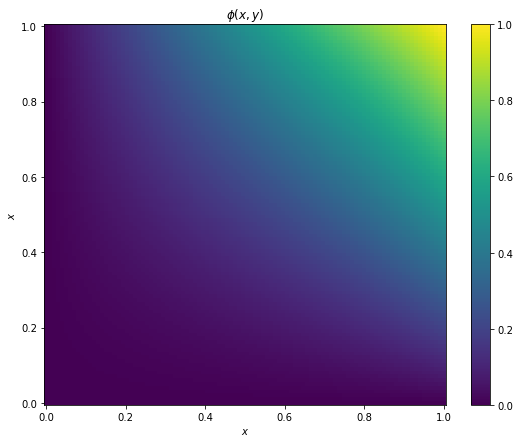

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline


# Make the plot with colorbar
plt.figure(figsize=(9,7))
plt.pcolormesh(x, y, phi, shading='auto')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$x$')
plt.title(r'$\phi(x,y)$')
plt.show()